# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv("cardekho_dataset.csv")

# Print shape of dataset
print(df.shape)

(15411, 14)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [2]:
##Check features with nan value
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

**Report** 
- There are No null values in the data 

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [3]:
df.duplicated().sum()

0

**Report**
* No Duplicates in the dataset.

# Feature Engineering

In [4]:
df.loc[df['brand']== 'Ferrari']

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3799,4845,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000


#### Brand and model column can be dropped as the information is already available in car_name

In [5]:
 df.drop(['Unnamed: 0' , 'car_name'], axis=1, inplace=True)

In [6]:
df.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [7]:
print(df.shape)

(15411, 12)


In [8]:
df.loc[df['brand']== 'Hyundai']

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
6,Hyundai,i10,8,40000,Dealer,Petrol,Manual,20.36,1197,78.90,5,315000
8,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
10,Hyundai,Verna,8,65278,Dealer,Diesel,Manual,22.32,1582,126.32,5,425000
...,...,...,...,...,...,...,...,...,...,...,...,...
15386,Hyundai,Grand,3,30000,Individual,Petrol,Manual,18.90,1197,81.86,5,456000
15393,Hyundai,i20,3,10000,Individual,Petrol,Manual,18.60,1197,81.83,5,750000
15395,Hyundai,i10,9,64000,Dealer,Petrol,Manual,20.36,1197,78.90,5,395000
15405,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000


### Type of Features

**Numeric Features**

In [9]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 7


In [10]:
print(num_features)

['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


**Categorical Features**

In [11]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
print(cat_features)

Num of Categorical Features : 5
['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


**Discrete Features**

In [12]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
print(discrete_features)

Num of Discrete Features : 2
['vehicle_age', 'seats']


**Continues Features**

In [13]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))
print(continuous_features)

Num of Continuous Features : 5
['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


### Multicollinearity Check
#### Correllation Heatmap

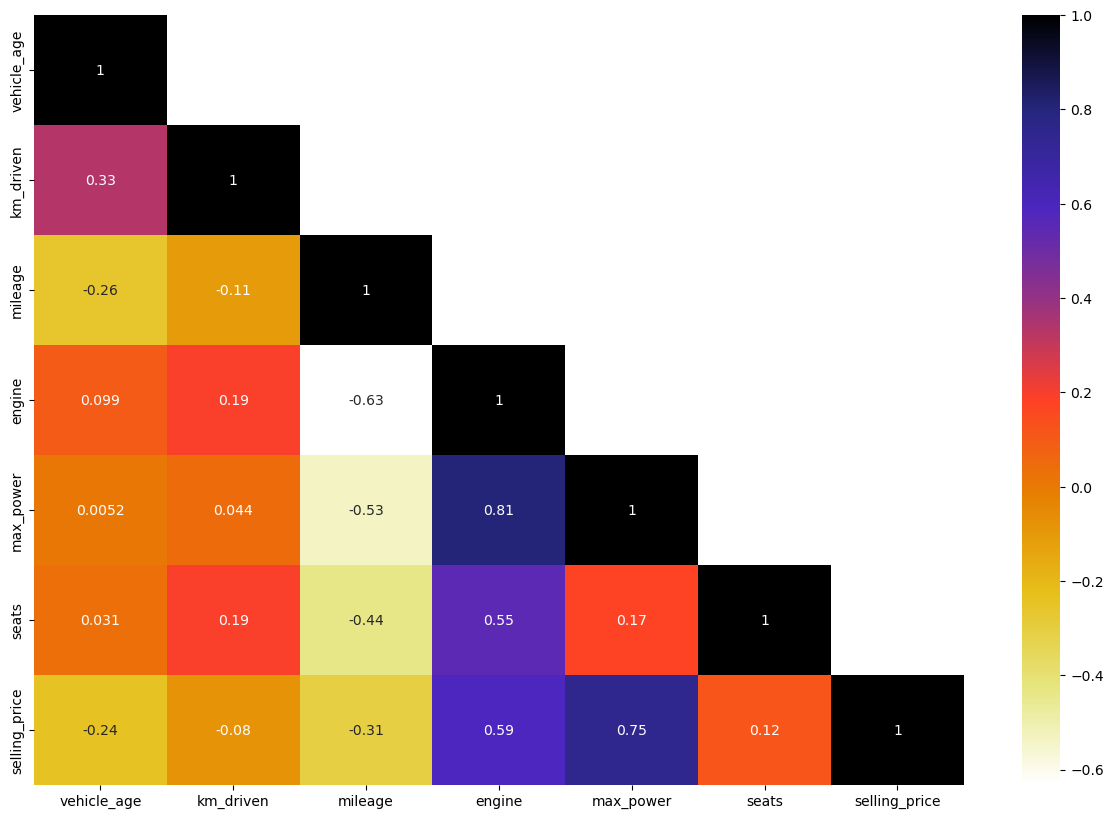

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True, mask= np.triu(df.corr(), k=1))
plt.show()

**Report** 
* Max power and Engine cc are highly correlated.
* We can check Vif to remove any highly correlated independent features.

#### Variance Inflation Factor (VIF)

* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

## Formula for VIF

VIFi = 1/1-Ri^2


Where:
Ri^2 is the coefficient of determination obtained by regressing the i^th variable on all other independent variables.

In [15]:
import statsmodels.api as sm
num_features = df.select_dtypes(exclude="object").columns
for i in range(0, len(num_features)-1):
    x = df.loc[:, df.columns == num_features[i]]
    y = df.selling_price
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            num_features[i], vif)
        )

Variance Inflation Factor of vehicle_age column is 1.34 

Variance Inflation Factor of km_driven column is 1.24 

Variance Inflation Factor of mileage column is 1.54 

Variance Inflation Factor of engine column is 2.41 

Variance Inflation Factor of max_power column is 3.13 

Variance Inflation Factor of seats column is 1.77 



 ” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable “ 
 
**- This Dataset have MultiCollinearity in max_power column but not so much** 

- Max Power and Engine are correlated but we can consider these two features because they hold important information for a vechicle.

### Check Outlier and Capping it

**Why outliers?**
* Data Entry error : Human error. 
* Measurement error: Instrument error. 
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

**Why IQR For Outlier Handling?**
* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

* As some columns are skewed we go with IQR method for outlier treatment

* The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

* where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

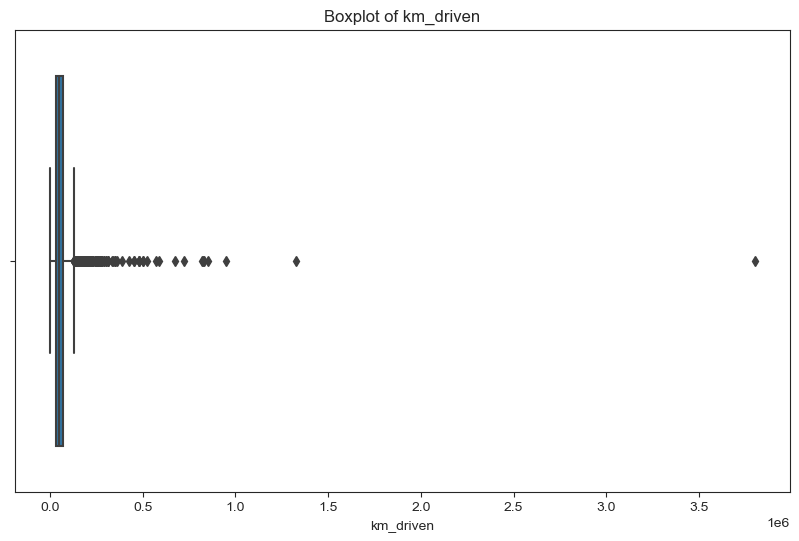

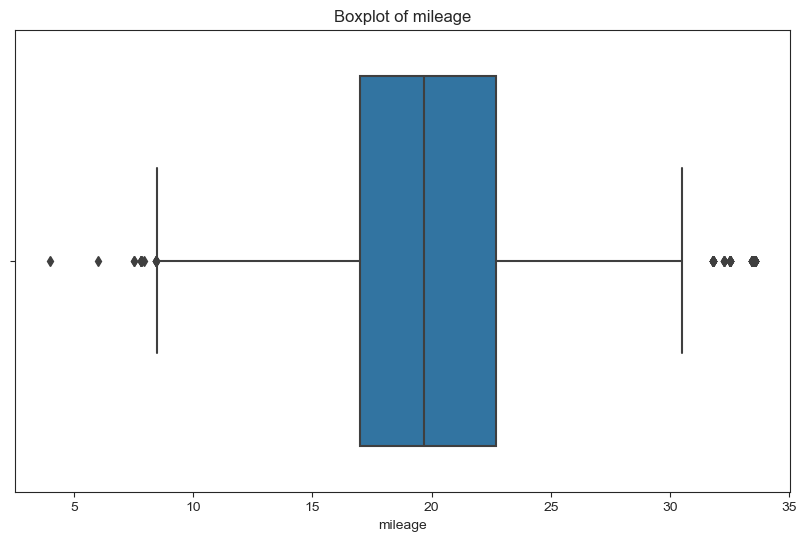

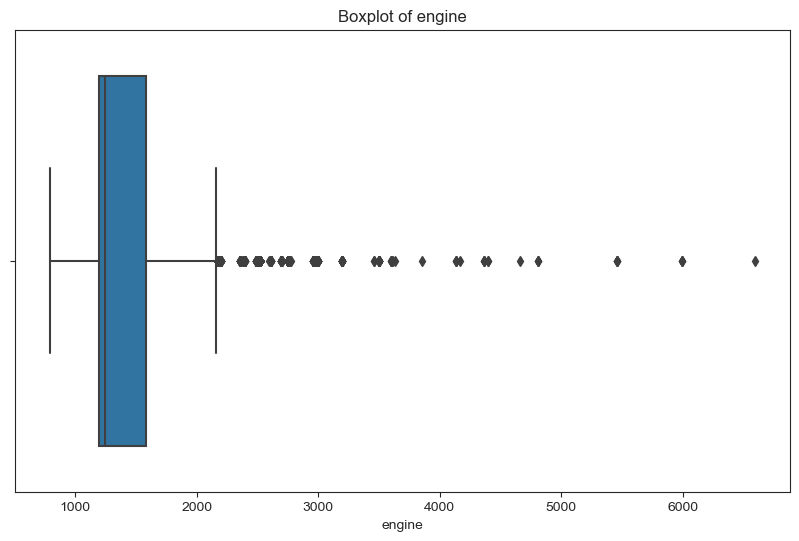

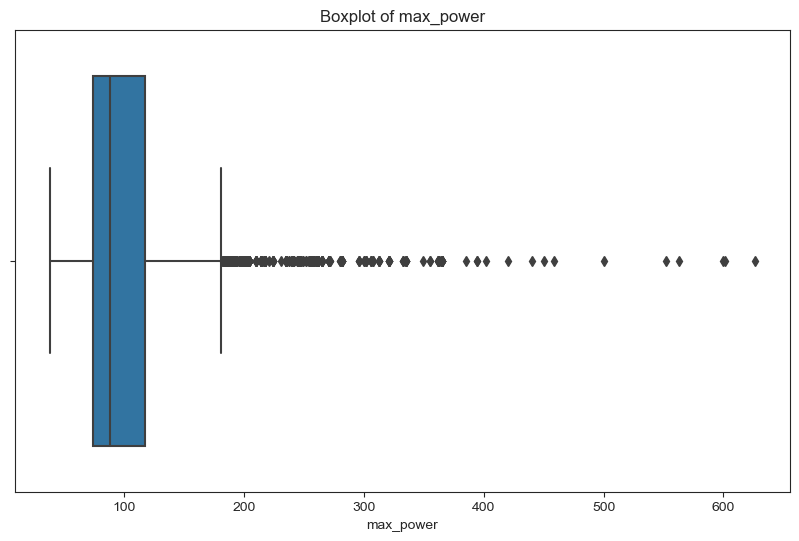

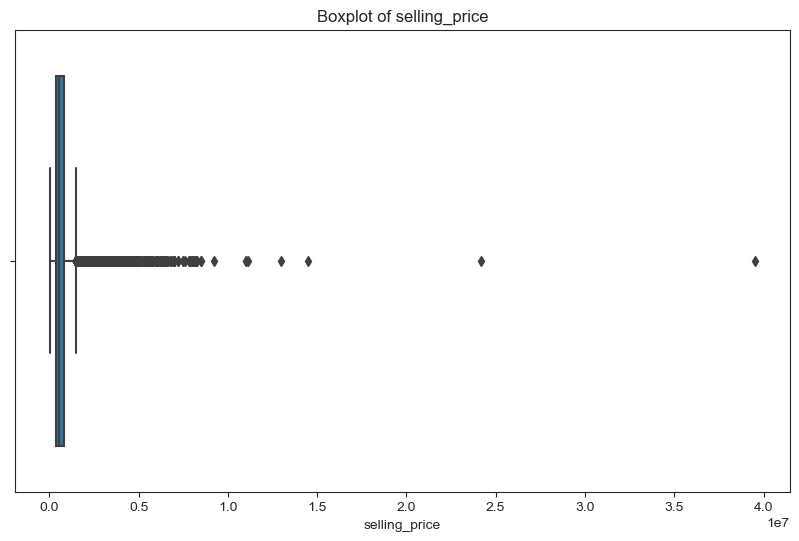

In [16]:
for i in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.set_style('ticks')
    ax = sns.boxplot(x=df[i])  # Explicitly specify 'x'
    plt.title(f"Boxplot of {i}")  # Optional: Add title
    plt.show()

**Detecting Outlier and Capping it**

In [17]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

**Why are we capping it and why not trim it ?**
* Trimming outliers may result in the removal of a large number of records from this dataset as we have already very less rows so this isn’t desirable in this case since columns other than the ones containing the outlier values may contain useful information.

* In this cases, you can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.

In [18]:
for col in continuous_features:
         detect_outliers(col)


 #### km_driven ####
percentile25 30000.0
percentile75 70000.0
Upper limit 130000.0
Lower limit -30000.0

 #### mileage ####
percentile25 17.0
percentile75 22.7
Upper limit 31.25
Lower limit 8.450000000000001

 #### engine ####
percentile25 1197.0
percentile75 1582.0
Upper limit 2159.5
Lower limit 619.5

 #### max_power ####
percentile25 74.0
percentile75 117.3
Upper limit 182.25
Lower limit 9.050000000000011

 #### selling_price ####
percentile25 385000.0
percentile75 825000.0
Upper limit 1485000.0
Lower limit -275000.0


**Checking Skewness after Outlier Capping**

In [19]:
df[continuous_features].skew(axis=0, skipna=True)

km_driven        0.617437
mileage          0.067940
engine           0.684096
max_power        1.067229
selling_price    0.968836
dtype: float64

## Feature Transformation

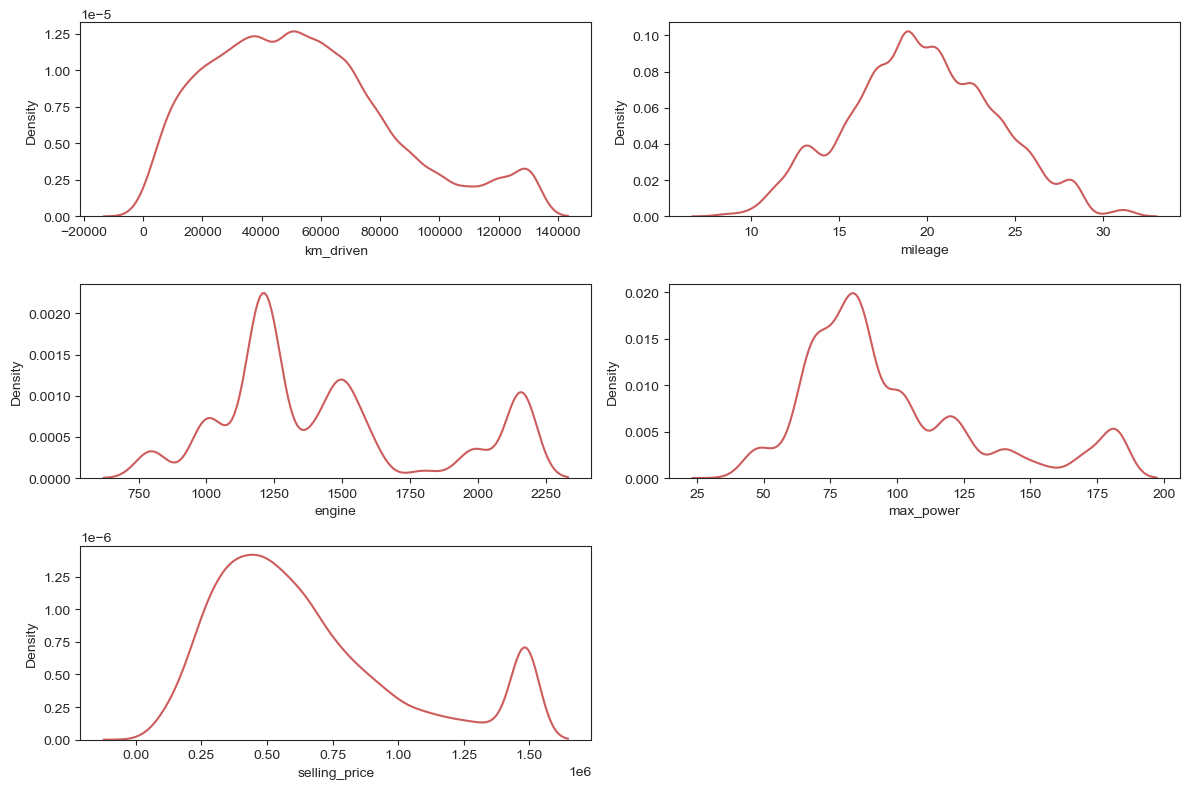

In [20]:
# distribution of data before scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Report**
* After Capping Outlier it is all column's distribution is Normal so transformation is not required.

### Split X and Y

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop({'selling_price'}, axis=1)
y = df[{'selling_price'}]

In [22]:
print(X)

          brand     model  vehicle_age  km_driven seller_type fuel_type  \
0        Maruti      Alto            9     120000  Individual    Petrol   
1       Hyundai     Grand            5      20000  Individual    Petrol   
2       Hyundai       i20           11      60000  Individual    Petrol   
3        Maruti      Alto            9      37000  Individual    Petrol   
4          Ford  Ecosport            6      30000      Dealer    Diesel   
...         ...       ...          ...        ...         ...       ...   
15406   Hyundai       i10            9      10723      Dealer    Petrol   
15407    Maruti    Ertiga            2      18000      Dealer    Petrol   
15408     Skoda     Rapid            6      67000      Dealer    Diesel   
15409  Mahindra    XUV500            5     130000      Dealer    Diesel   
15410     Honda      City            2      13000      Dealer    Petrol   

      transmission_type  mileage  engine  max_power  seats  
0                Manual    19.70   796

In [23]:
print(y)

       selling_price
0             120000
1             550000
2             215000
3             226000
4             570000
...              ...
15406         250000
15407         925000
15408         425000
15409        1225000
15410        1200000

[15411 rows x 1 columns]


In [24]:
print(X.shape)

(15411, 11)


In [25]:
print(y.shape)

(15411, 1)


* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “selling price” column.**


### Feature Selection

In [26]:
for feature in cat_features:
    print(feature,':', X[feature].nunique())

brand : 32
model : 120
seller_type : 3
fuel_type : 5
transmission_type : 2


## Feature Encoding and Scaling

### Data Preprocessing Techniques  

#### One-Hot Encoding for Low-Cardinality, Non-Ordinal Categorical Columns
One-hot encoding transforms categorical variables into a binary matrix, where each unique value is represented as a distinct column. This ensures the ML model treats categories independently, aiding in better prediction accuracy.  

#### Binary Encoding for High-Cardinality Categorical Columns  
Binary encoding reduces dimensionality by converting categories into binary digits, resulting in fewer columns compared to one-hot encoding. This approach balances compactness and effective representation, making it ideal for features with many unique values.  

#### Standard Scaling for Numeric Features  
StandardScaler normalizes numeric features by scaling them to a mean of 0 and a standard deviation of 1. This prevents features with larger scales from dominating the model and accelerates convergence in gradient-based algorithms.  

#### Grouping Rare Categories  
For high-cardinality features like `brand` and `model`, rare categories are grouped under "Other" to simplify the dataset and minimize noise caused by infrequent values.  

#### Target Encoding for Mixed Categorical Columns  
Target encoding replaces categories with the mean target value, capturing relationships between categorical features and the target variable. It effectively reduces noise and dimensionality in datasets with ordinal or complex relationships.

In [27]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']
binary_columns = ['brand','model']
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from category_encoders import TargetEncoder,BinaryEncoder
import pandas as pd



numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
binary_transformer = BinaryEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
         ("StandardScaler", numeric_transformer, num_features),
        ("BinaryEncoder", binary_transformer, binary_columns)
        
    ]
)
# Simplify categorical columns
def simplify_categories(df, col, threshold=10):
    value_counts = df[col].value_counts()
    rare_categories = value_counts[value_counts < threshold].index
    df[col] = df[col].apply(lambda x: x if x not in rare_categories else "Other")
    return df

# Apply category simplification
for col in ['brand', 'model']:
    X = simplify_categories(X, col)

# Define transformers
numeric_transformer = StandardScaler()
target_transformer = TargetEncoder(cols=onehot_columns + binary_columns)

# Preprocessor Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("target", target_transformer, onehot_columns + binary_columns)
    ]
)

# Transform data
X_transformed = preprocessor.fit_transform(X, y)

# Ensure the shape matches the original 11 features
print("Shape of transformed data:", X_transformed.shape)

Shape of transformed data: (15411, 11)


In [28]:
print(preprocessor)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')),
                                ('target',
                                 TargetEncoder(cols=['seller_type', 'fuel_type',
                                                     'transmission_type',
                                                     'brand', 'model']),
                                 ['seller_type', 'fuel_type',
                                  'transmission_type', 'brand', 'model'])])


In [29]:

print(type(X_transformed))  # Should output a NumPy array or sparse matrix
print(X_transformed[:5])    # View the first 5 rows of transformed data


<class 'numpy.ndarray'>
[[ 9.83561835e-01  2.14698862e+00  1.31337694e-03 -1.61883152e+00
  -1.49744825e+00 -4.03022414e-01  5.75750461e+05  5.19593206e+05
   5.58003589e+05  4.87089318e+05  2.45452442e+05]
 [-3.43933310e-01 -1.08090335e+00 -1.91636595e-01 -6.00233502e-01
  -4.69389481e-01 -4.03022414e-01  5.75750461e+05  5.19593206e+05
   5.58003589e+05  5.74615023e+05  4.74451724e+05]
 [ 1.64730941e+00  2.10253439e-01 -6.49892777e-01 -6.00233502e-01
  -5.26983809e-01 -4.03022414e-01  5.75750461e+05  5.19593206e+05
   5.58003589e+05  5.74615023e+05  5.43603753e+05]
 [ 9.83561835e-01 -5.32161716e-01  2.95562084e-01 -1.10572229e+00
  -8.98467229e-01 -4.03022414e-01  5.75750461e+05  5.19593206e+05
   5.58003589e+05  4.87089318e+05  2.45452442e+05]
 [-1.20595237e-02 -7.58114154e-01  7.41758893e-01  1.64350048e-01
   8.35547546e-03 -4.03022414e-01  7.05096237e+05  8.07923305e+05
   5.58003589e+05  5.93006329e+05  7.06227273e+05]]


## Train Test Split

* The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

* It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [30]:
# Step 1: Encode or preprocess the entire dataset
X_transformed = preprocessor.fit_transform(X, y)

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Check the shapes
print(X_train.shape, X_test.shape)


(12328, 11) (3083, 11)


In [31]:
print("X_train (features) first 5 rows:")
print(X_train[:5])  # Slicing for NumPy array

print("y_train (target) first 5 rows:")
print(y_train[:5])  # Slicing for NumPy array

print("X_test (features) first 5 rows:")
print(X_test[:5])  # Slicing for NumPy array

print("y_test (target) first 5 rows:")
print(y_test[:5])  # Slicing for NumPy array


X_train (features) first 5 rows:
[[ 3.19814262e-01  5.41176924e-01 -2.04878007e+00  1.84465575e+00
   2.41752624e+00 -4.03022414e-01  7.05096237e+05  8.07923305e+05
   1.03087884e+06  1.06113183e+06  1.29173169e+06]
 [-1.33955467e+00 -1.40369255e+00  9.99829480e-01 -5.95153212e-01
  -4.11795152e-01 -4.03022414e-01  5.75750461e+05  5.19593206e+05
   5.58003589e+05  6.75776744e+05  4.52049035e+05]
 [-1.33955467e+00 -1.53280823e+00 -1.67517848e-01  1.31249544e+00
   2.41752624e+00 -4.03022414e-01  7.05096237e+05  8.07923305e+05
   1.03087884e+06  1.30953412e+06  1.29173169e+06]
 [ 3.19814262e-01  3.07090198e-01 -4.56942806e-01  1.61809903e-01
   5.47150420e-01 -4.03022414e-01  7.05096237e+05  5.19593206e+05
   5.58003589e+05  6.11306397e+05  6.25315720e+05]
 [ 1.31543562e+00  8.65257278e-01  1.60497104e-01 -6.00233502e-01
  -5.58660690e-01 -4.03022414e-01  7.05096237e+05  5.19593206e+05
   5.58003589e+05  5.74615023e+05  2.79175610e+05]]
y_train (target) first 5 rows:
       selling_price

## Model Selection
* **Here should understand the Various Regression models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with HyperParameter Tuning**

**Import Required packages for model training**

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

#### Create a Function to Evaluate Model

In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

# Loop through each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate performance for both training and test sets
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print performance results
    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 131241.1485
- Mean Absolute Error: 98851.1753
- R2 Score: 0.8739
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 136318.3706
- Mean Absolute Error: 102981.1991
- R2 Score: 0.8726


Lasso
Model performance for Training set
- Root Mean Squared Error: 131241.1487
- Mean Absolute Error: 98851.1408
- R2 Score: 0.8739
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 136318.3333
- Mean Absolute Error: 102981.0460
- R2 Score: 0.8726


Ridge
Model performance for Training set
- Root Mean Squared Error: 131241.1511
- Mean Absolute Error: 98850.4135
- R2 Score: 0.8739
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 136318.7848
- Mean Absolute Error: 102980.4612
- R2 Score: 0.8726


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 85489.3171
- Mean Abso

**Results of All Models**

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.946796
6,XGBRegressor,0.943958
5,Random Forest Regressor,0.937047
3,K-Neighbors Regressor,0.919987
4,Decision Tree,0.901584
1,Lasso,0.872649
0,Linear Regression,0.872649
2,Ridge,0.872649
8,AdaBoost Regressor,0.840837


In [36]:

# Create a DataFrame to compare models based on R2 Score
model_comparison = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])
model_comparison = model_comparison.sort_values(by=["R2_Score"], ascending=False)

# Show model comparison
print(model_comparison)


                Model Name  R2_Score
7    CatBoosting Regressor  0.946796
6             XGBRegressor  0.943958
5  Random Forest Regressor  0.937047
3    K-Neighbors Regressor  0.919987
4            Decision Tree  0.901584
1                    Lasso  0.872649
0        Linear Regression  0.872649
2                    Ridge  0.872649
8       AdaBoost Regressor  0.840837


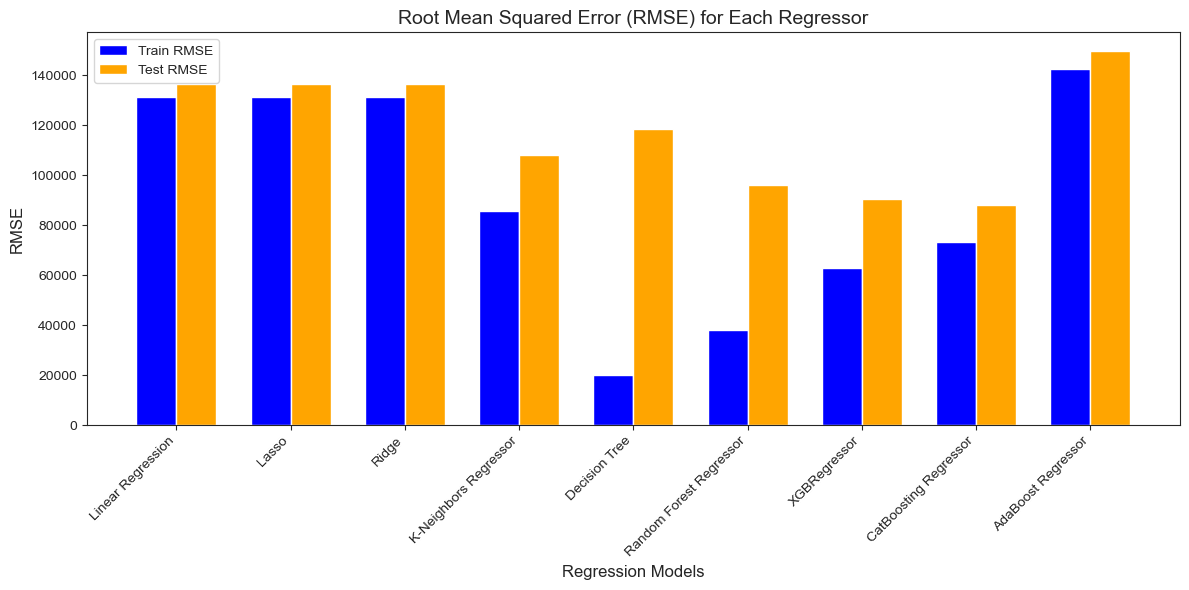

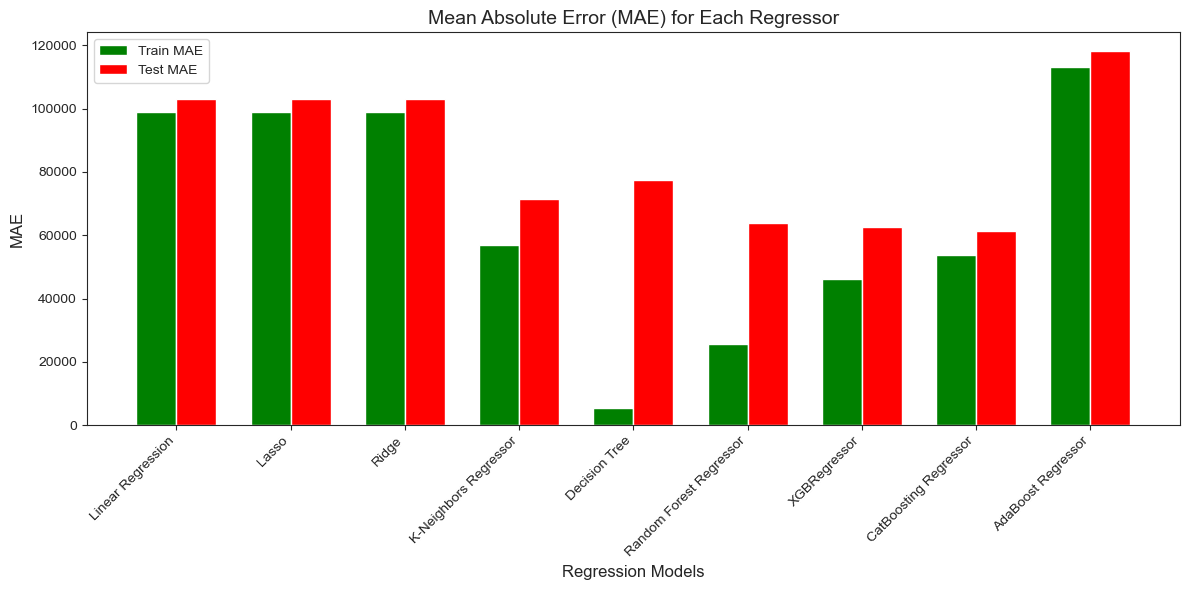

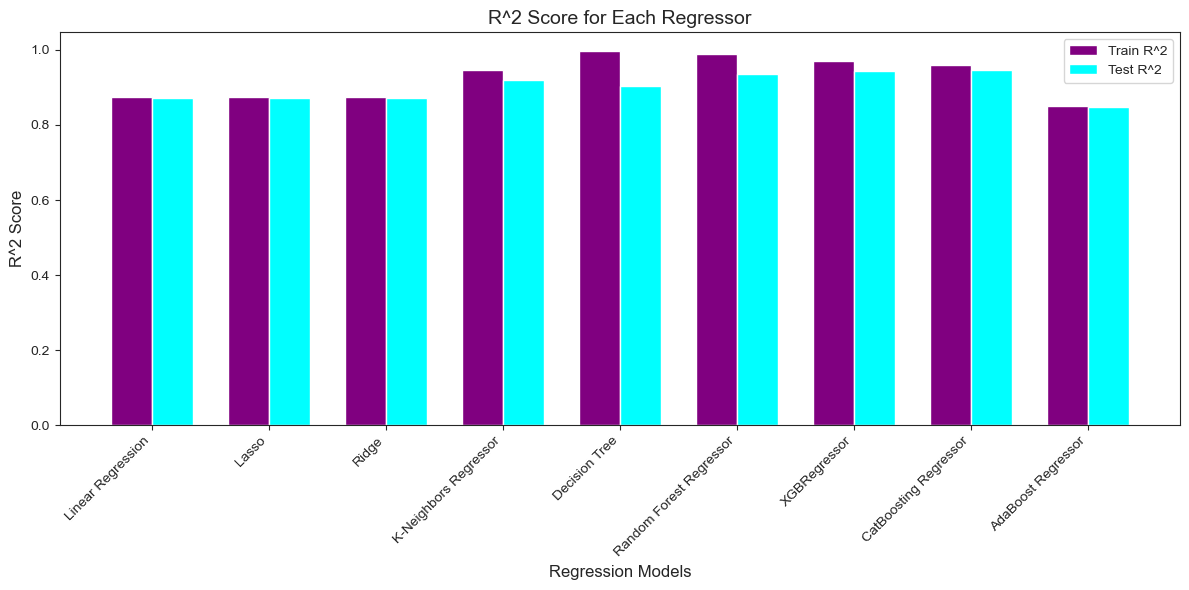

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store metrics for training and test sets
train_rmse_list, test_rmse_list = [], []
train_mae_list, test_mae_list = [], []
train_r2_list, test_r2_list = [], []

# Iterate over models and collect metrics
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Append metrics to lists
    train_rmse_list.append(model_train_rmse)
    test_rmse_list.append(model_test_rmse)
    train_mae_list.append(model_train_mae)
    test_mae_list.append(model_test_mae)
    train_r2_list.append(model_train_r2)
    test_r2_list.append(model_test_r2)

# Plot RMSE for each model (Training vs Testing)
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x - bar_width/2, train_rmse_list, width=bar_width, label='Train RMSE', color='blue')
plt.bar(x + bar_width/2, test_rmse_list, width=bar_width, label='Test RMSE', color='orange')

plt.xlabel('Regression Models', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Root Mean Squared Error (RMSE) for Each Regressor', fontsize=14)
plt.xticks(x, list(models.keys()), rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# Plot MAE for each model (Training vs Testing)
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, train_mae_list, width=bar_width, label='Train MAE', color='green')
plt.bar(x + bar_width/2, test_mae_list, width=bar_width, label='Test MAE', color='red')

plt.xlabel('Regression Models', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('Mean Absolute Error (MAE) for Each Regressor', fontsize=14)
plt.xticks(x, list(models.keys()), rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# Plot R^2 Score for each model (Training vs Testing)
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, train_r2_list, width=bar_width, label='Train R^2', color='purple')
plt.bar(x + bar_width/2, test_r2_list, width=bar_width, label='Test R^2', color='cyan')

plt.xlabel('Regression Models', fontsize=12)
plt.ylabel('R^2 Score', fontsize=12)
plt.title('R^2 Score for Each Regressor', fontsize=14)
plt.xticks(x, list(models.keys()), rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


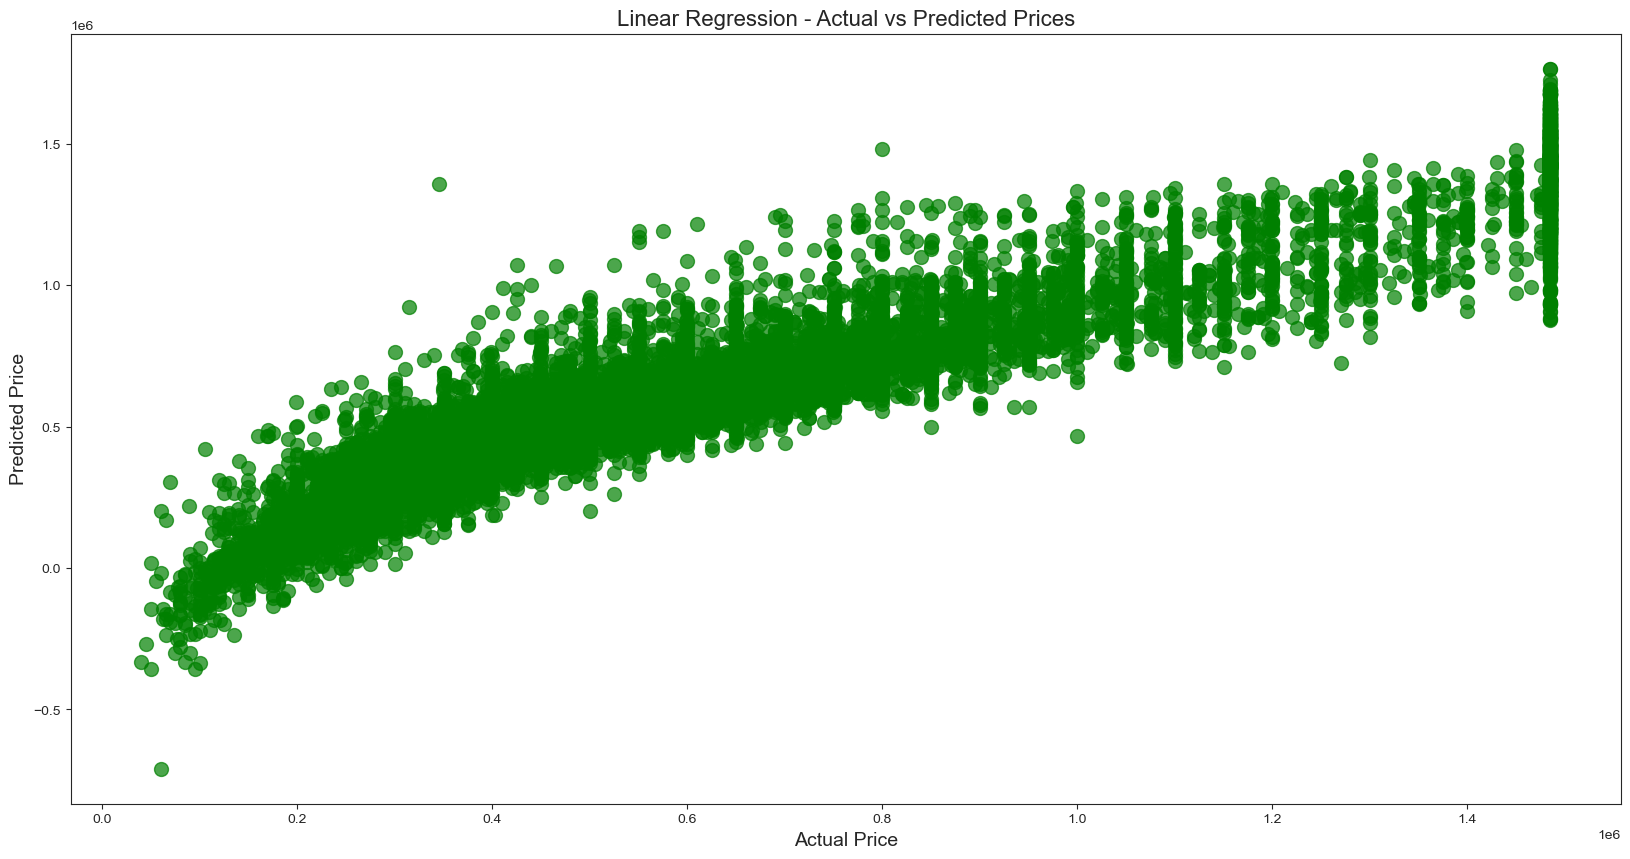

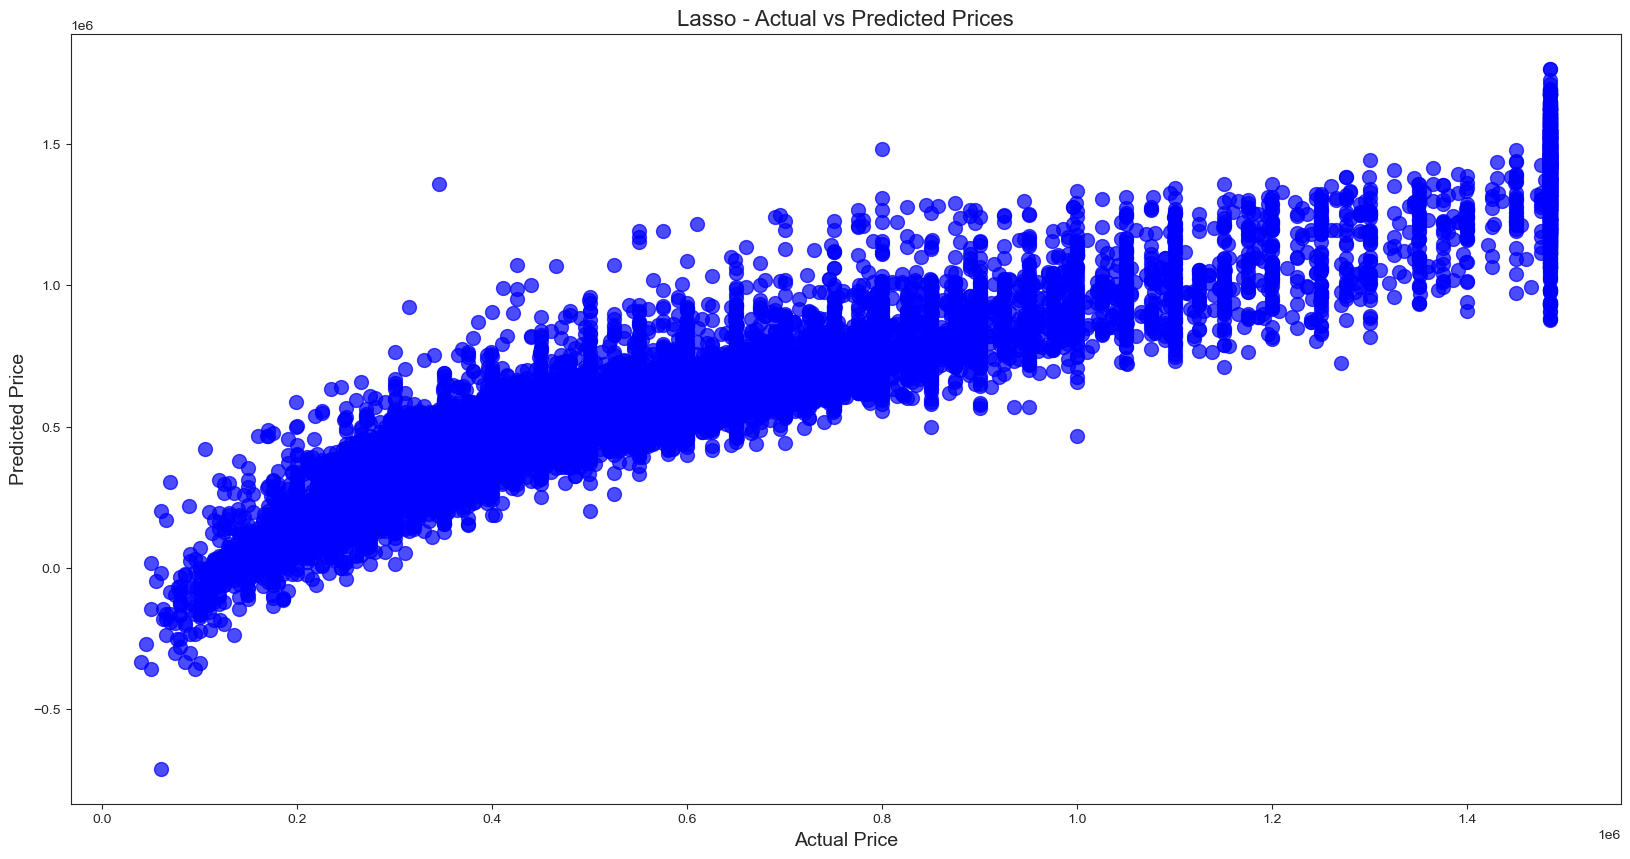

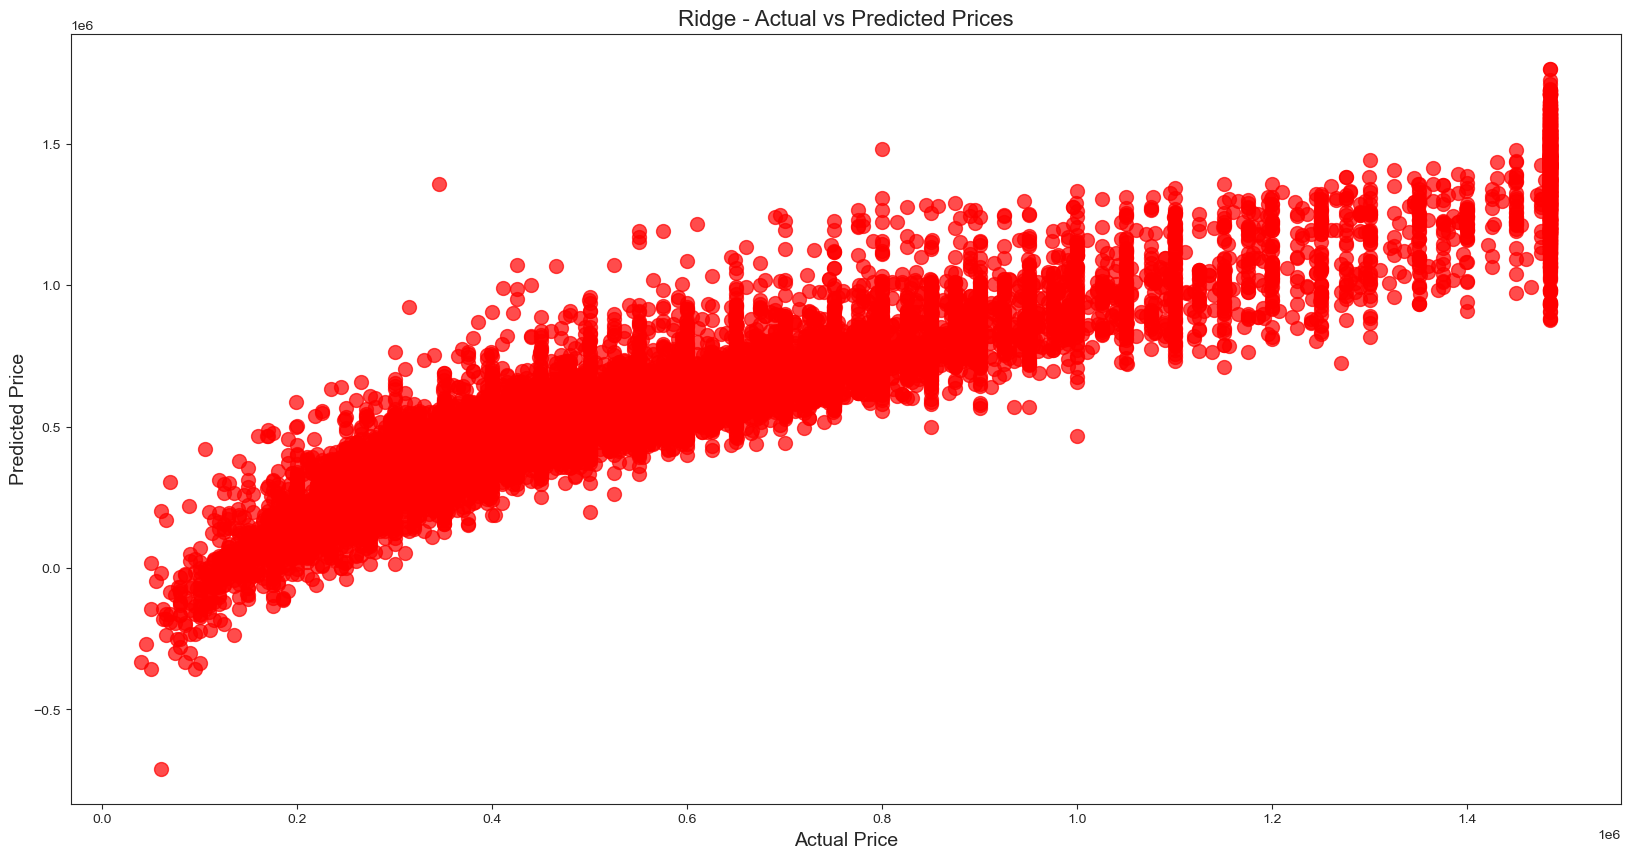

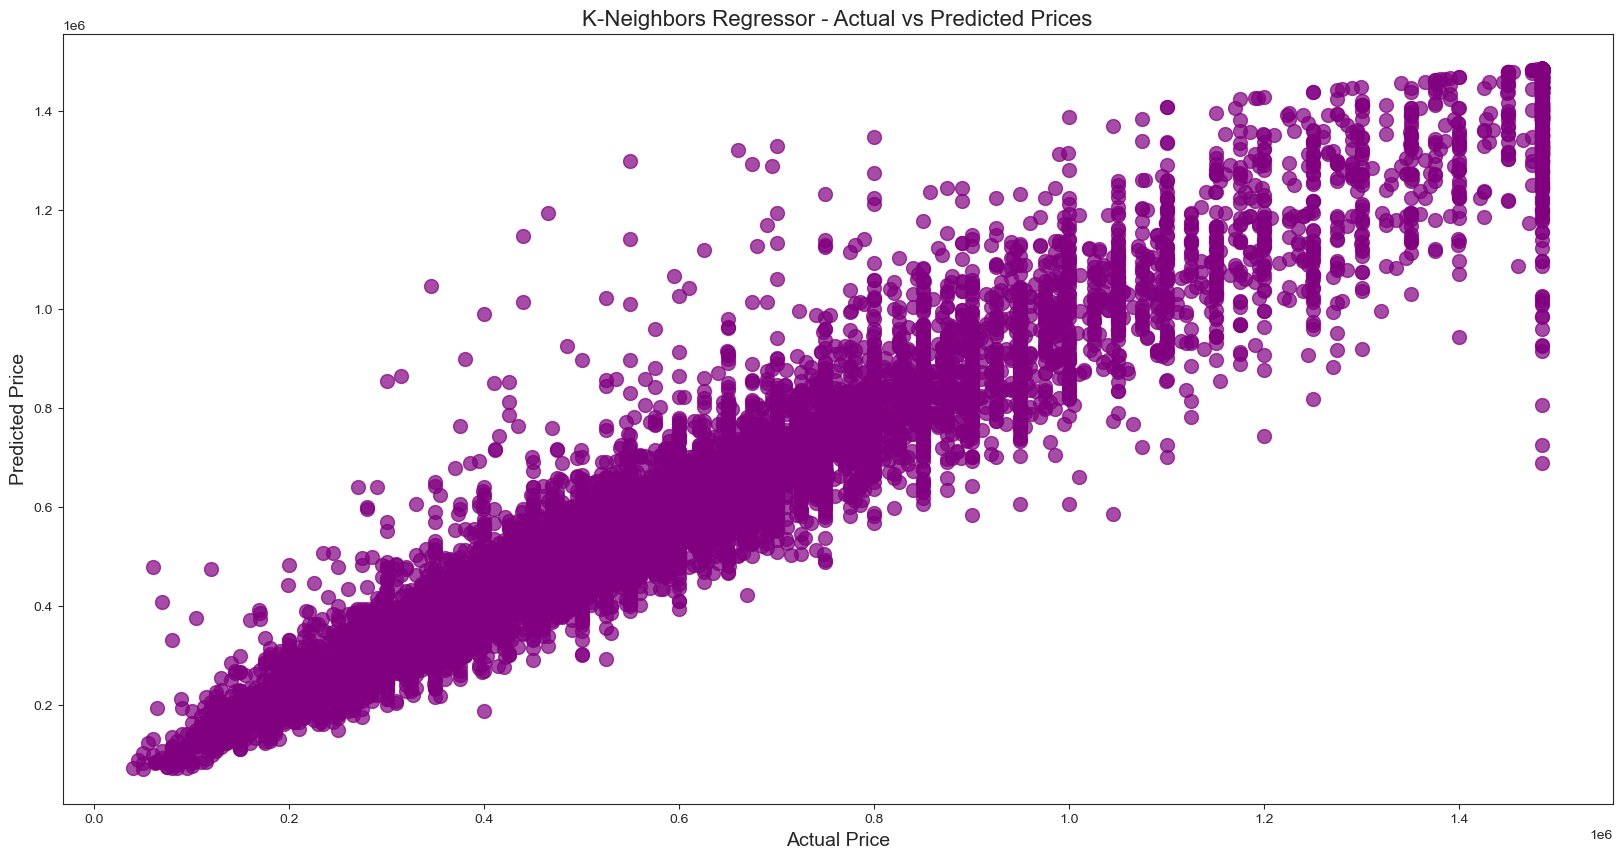

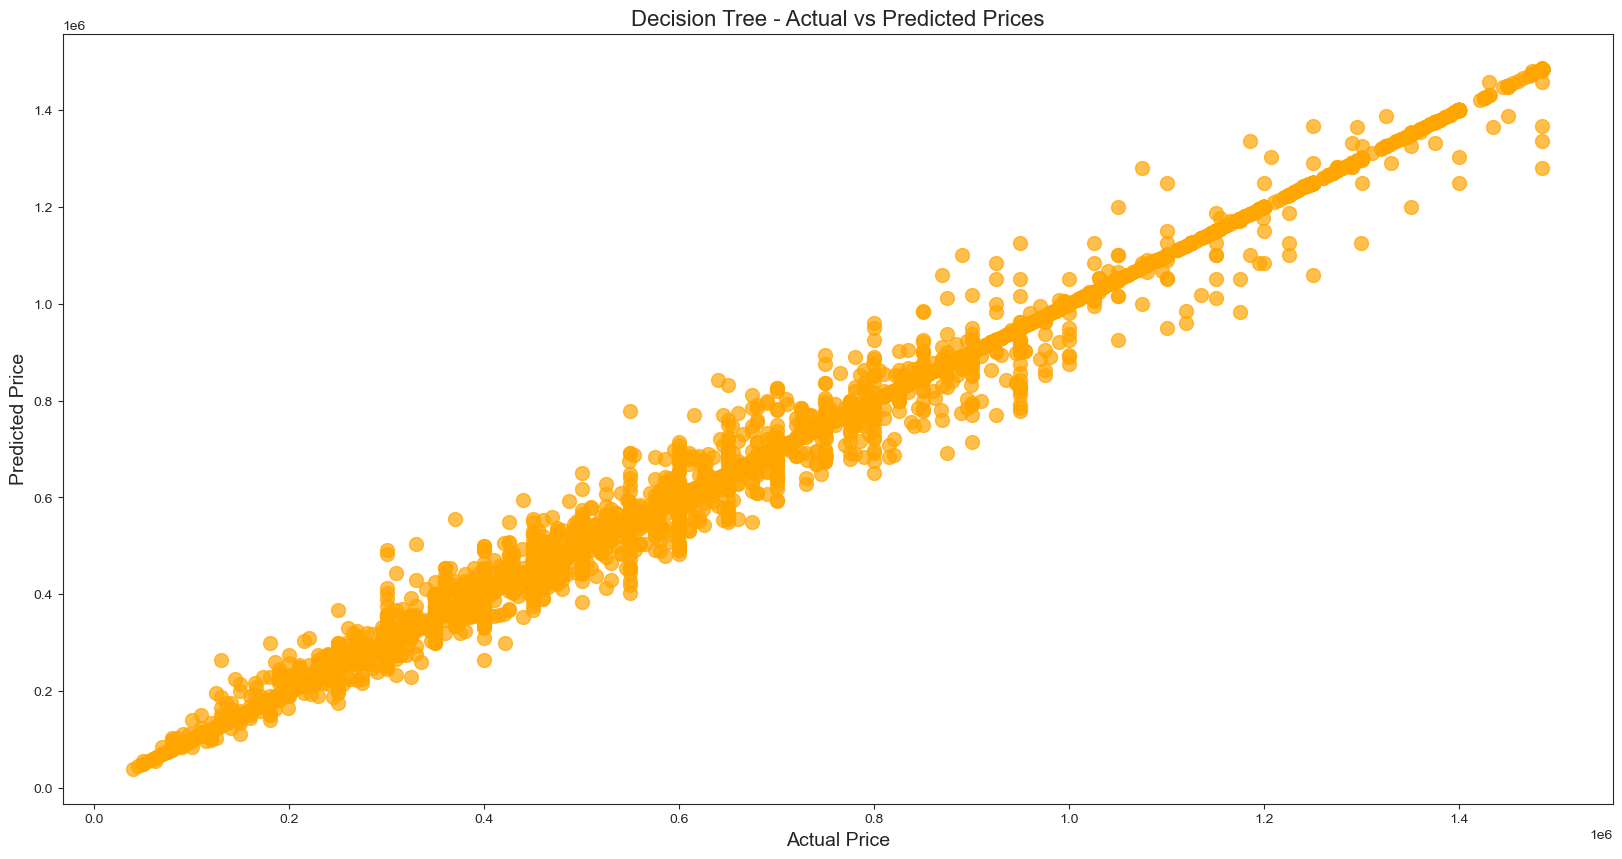

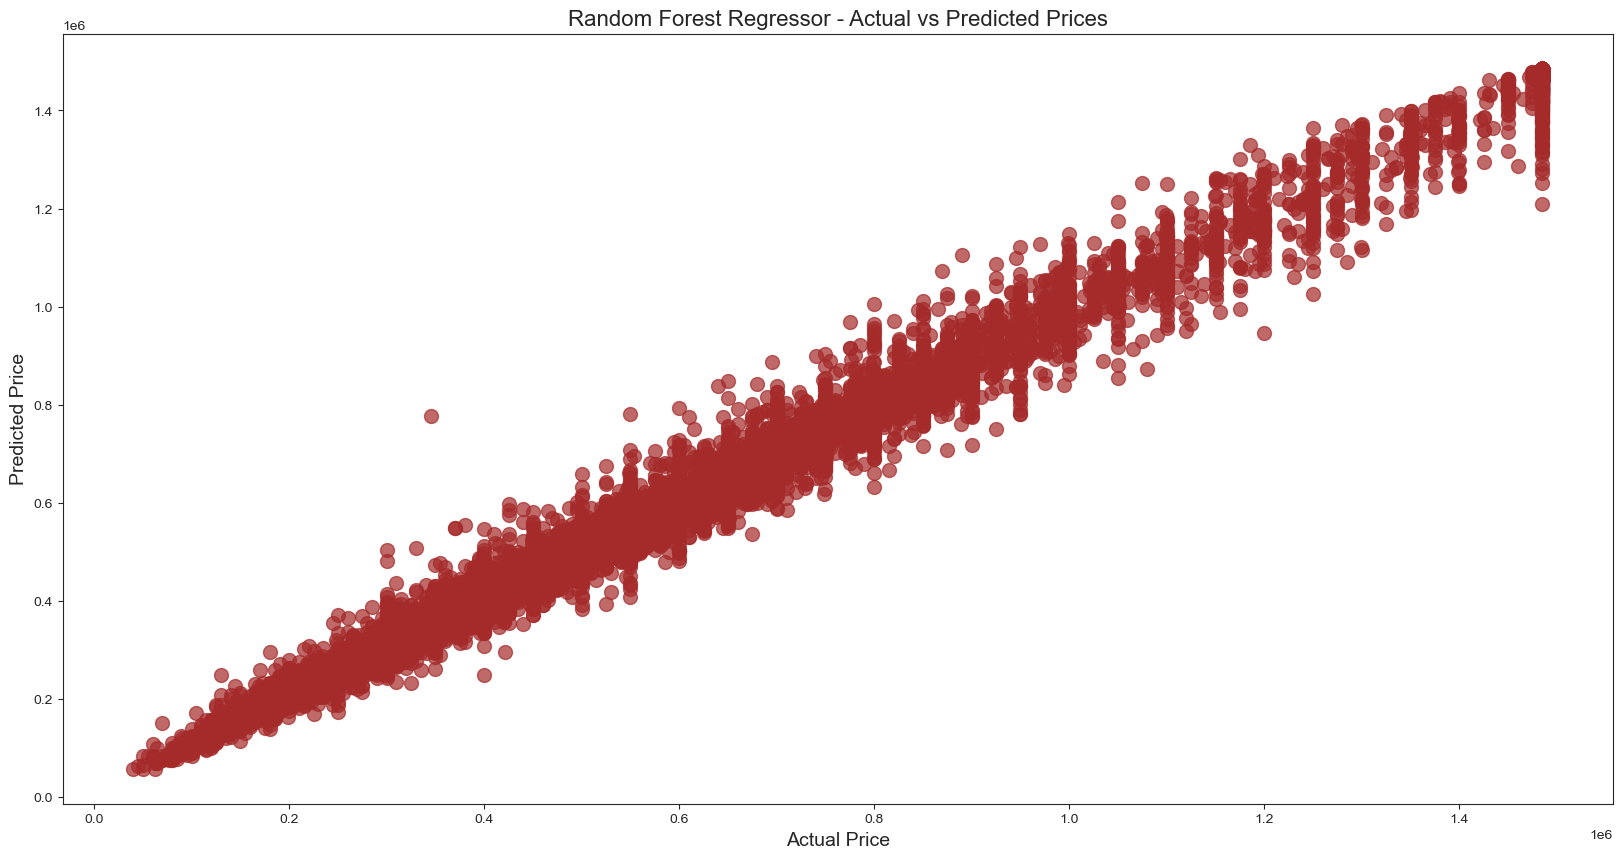

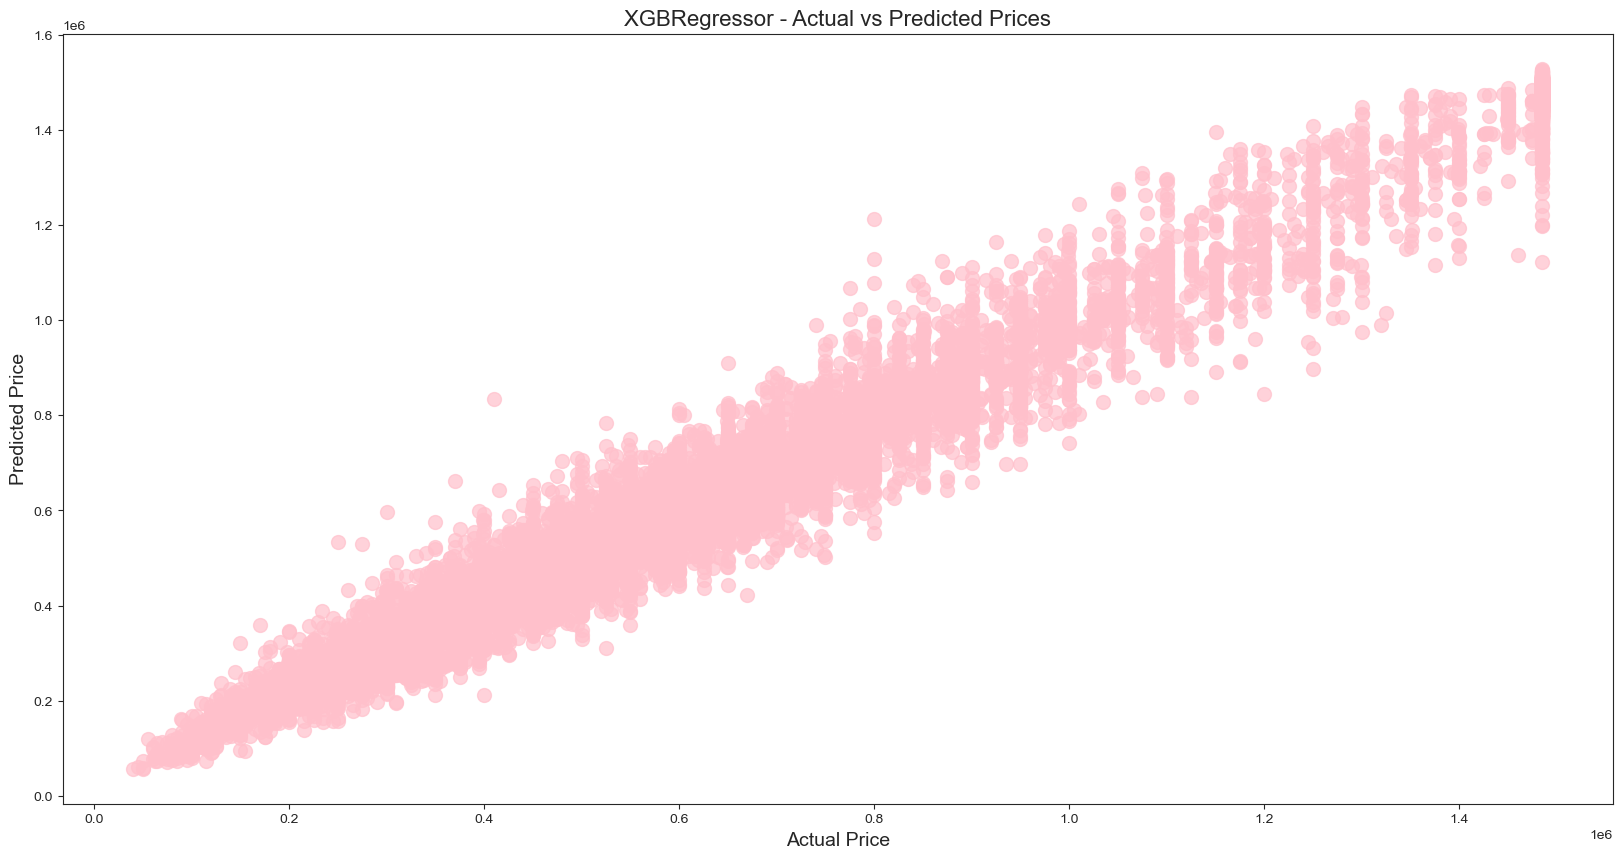

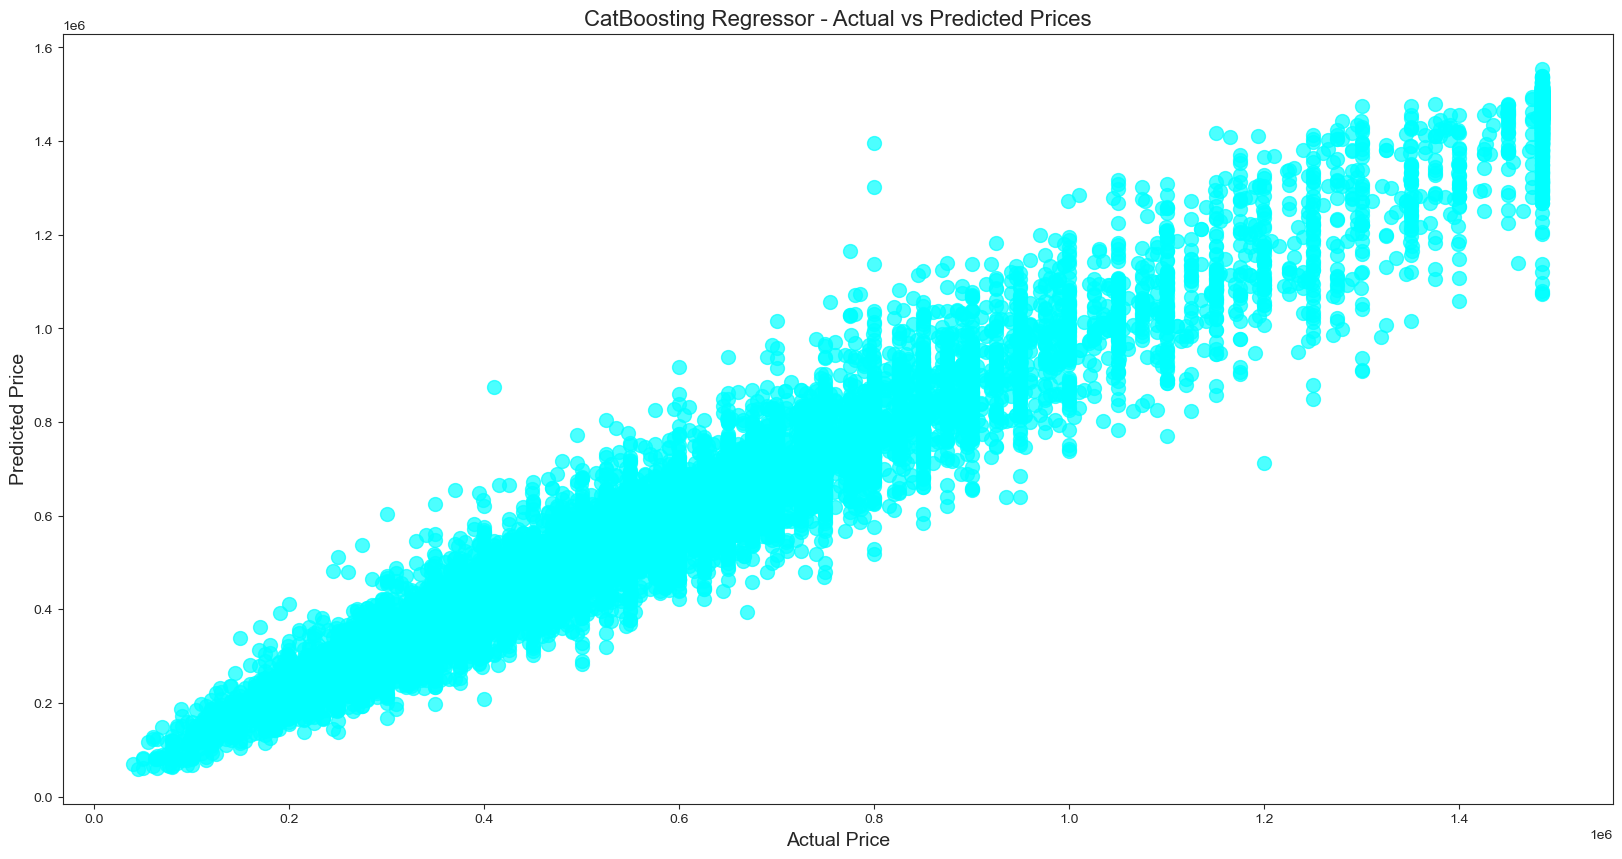

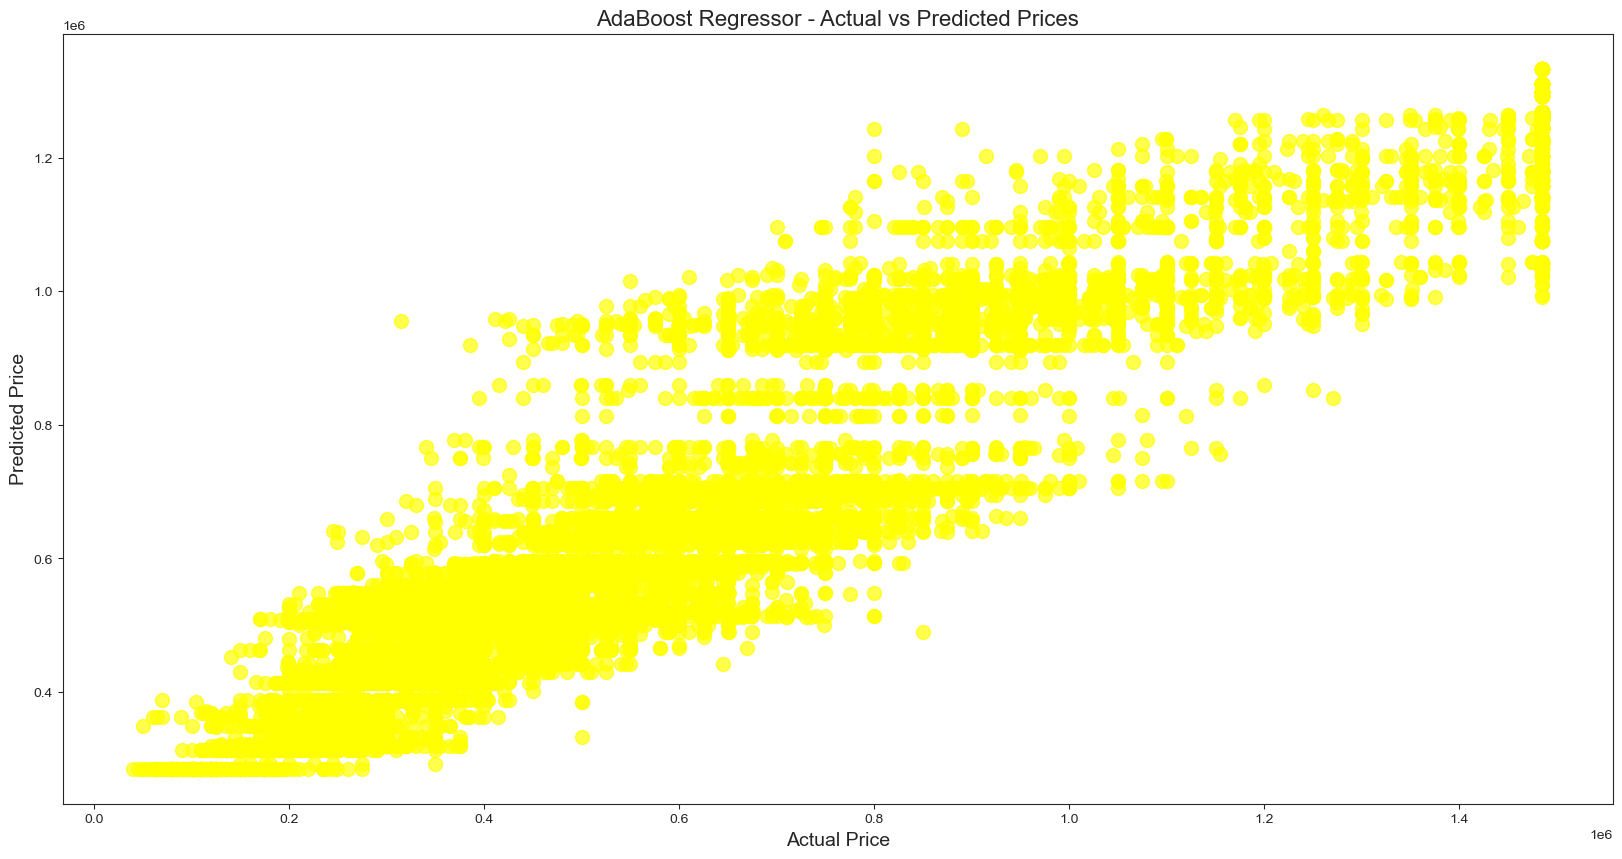

In [38]:
import matplotlib.pyplot as plt

# List of colors for different models
colors = ['green', 'blue', 'red', 'purple', 'orange', 'brown', 'pink', 'cyan', 'yellow']

# Iterate over models and generate scatter plots
for i, model in enumerate(models.values()):
    model_name = list(models.keys())[i]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    
    # Scatter plot for Actual vs Predicted
    plt.figure(figsize=(20, 10))
    plt.scatter(y_train, y_train_pred, s=100, color=colors[i], alpha=0.7)
    
    # Adding titles and labels
    plt.xlabel("Actual Price", fontsize=14)
    plt.ylabel("Predicted Price", fontsize=14)
    plt.title(f"{model_name} - Actual vs Predicted Prices", fontsize=16)
    
    # Show the plot
    plt.show()


**Here we can use Random Forest , XGBoost Regressor, CatBoost Regressor and K-Neighbours Regressor for Hyper Parameter Tuning**

In [39]:
# K-Nearest Neighbors (KNN) hyperparameters
knn_params = {
    "n_neighbors": [2, 3, 5, 10, 20, 40, 50],
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Random Forest hyperparameters
rf_params = {
    "max_depth": [5, 8, 10, 12, None],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000],
    "min_samples_leaf": [1, 2, 5, 10],  
    "bootstrap": [True, False]          
}

# XGBoost hyperparameters
xgboost_params = {
    "learning_rate": [0.1, 0.01, 0.05],
    "max_depth": [5, 8, 12, 20, 30],
    "n_estimators": [100, 200, 300, 500],
    "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4],
    "subsample": [0.6, 0.8, 1],          
    "gamma": [0, 0.1, 0.2]              
}

# CatBoost hyperparameters
cat_params = {
    "learning_rate": [0.1, 0.01, 0.06, 0.05],
    "depth": [6, 8, 12, 20, 30],  # Removed "max_depth"
    "iterations": [500, 1000, 2000],  
    "l2_leaf_reg": [1, 3, 5, 10],     
    "bootstrap_type": ['Bayesian', 'Bernoulli', 'MVS'] 
}



In [40]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params),
                   ('XGBoost', XGBRegressor(), xgboost_params),
                   ('CatBoost', CatBoostRegressor(verbose=False), cat_params)
                   ]

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# List of models with their respective parameter grids
randomcv_models = [
    ('KNN', KNeighborsRegressor(), knn_params),
    ('RF', RandomForestRegressor(), rf_params),
    ('XGBoost', XGBRegressor(), xgboost_params),
    ('CatBoost', CatBoostRegressor(verbose=False), cat_params)
]

# Perform RandomizedSearchCV for each model
model_param = {}
for name, model, params in randomcv_models:
    print(f"Starting RandomizedSearchCV for {name}...")
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=20,  # Number of parameter settings sampled
        cv=3,  # Cross-validation folds
        verbose=1,  # Display progress
        n_jobs=-1  # Use all CPU cores
    )
    random.fit(X_train, y_train)  # Fit the model on training data
    model_param[name] = random.best_params_  # Store best parameters

# Display best parameters for each model
for model_name, best_params in model_param.items():
    print(f"---------------- Best Params for {model_name} -------------------")
    print(best_params)


Starting RandomizedSearchCV for KNN...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Starting RandomizedSearchCV for RF...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Starting RandomizedSearchCV for XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Starting RandomizedSearchCV for CatBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'auto'}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 12, 'bootstrap': True}
---------------- Best Params for XGBoost -------------------
{'subsample': 0.6, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
---------------- Best Params for CatBoost -------------------
{'learning_rate': 0.01, 'l2_leaf_reg': 3, 'iteratio

### Retraining the Model with best Parameters

In [42]:
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param.get('RF', {}), n_jobs=-1),
    "K-Neighbors Regressor": KNeighborsRegressor(**model_param.get('KNN', {})),
    "XGBRegressor": XGBRegressor(**model_param.get('XGBoost', {}), n_jobs=-1), 
    "CatBoosting Regressor": CatBoostRegressor(**model_param.get('CatBoost', {}), verbose=False)
}

model_list = []
r2_list = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Append results
    model_list.append(model_name)
    r2_list.append(model_test_r2)

    # Print performance
    print(f"{model_name} performance on Training set:")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")
    print("")

    print(f"{model_name} performance on Test set:")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    print("="*50)


Training Random Forest Regressor...
Random Forest Regressor performance on Training set:
- Root Mean Squared Error: 68347.3179
- Mean Absolute Error: 49300.6893
- R2 Score: 0.9658

Random Forest Regressor performance on Test set:
- Root Mean Squared Error: 91357.1684
- Mean Absolute Error: 62258.2232
- R2 Score: 0.9428
Training K-Neighbors Regressor...
K-Neighbors Regressor performance on Training set:
- Root Mean Squared Error: 19930.5681
- Mean Absolute Error: 5388.9331
- R2 Score: 0.9971

K-Neighbors Regressor performance on Test set:
- Root Mean Squared Error: 105838.0007
- Mean Absolute Error: 68774.5915
- R2 Score: 0.9232
Training XGBRegressor...
XGBRegressor performance on Training set:
- Root Mean Squared Error: 72315.4269
- Mean Absolute Error: 53000.0365
- R2 Score: 0.9617

XGBRegressor performance on Test set:
- Root Mean Squared Error: 89428.2926
- Mean Absolute Error: 61875.4091
- R2 Score: 0.9452
Training CatBoosting Regressor...
CatBoosting Regressor performance on Train

In [43]:
pd.DataFrame(list(zip(model_list, r2_list*100)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,XGBRegressor,0.945192
3,CatBoosting Regressor,0.944396
0,Random Forest Regressor,0.942802
1,K-Neighbors Regressor,0.923233


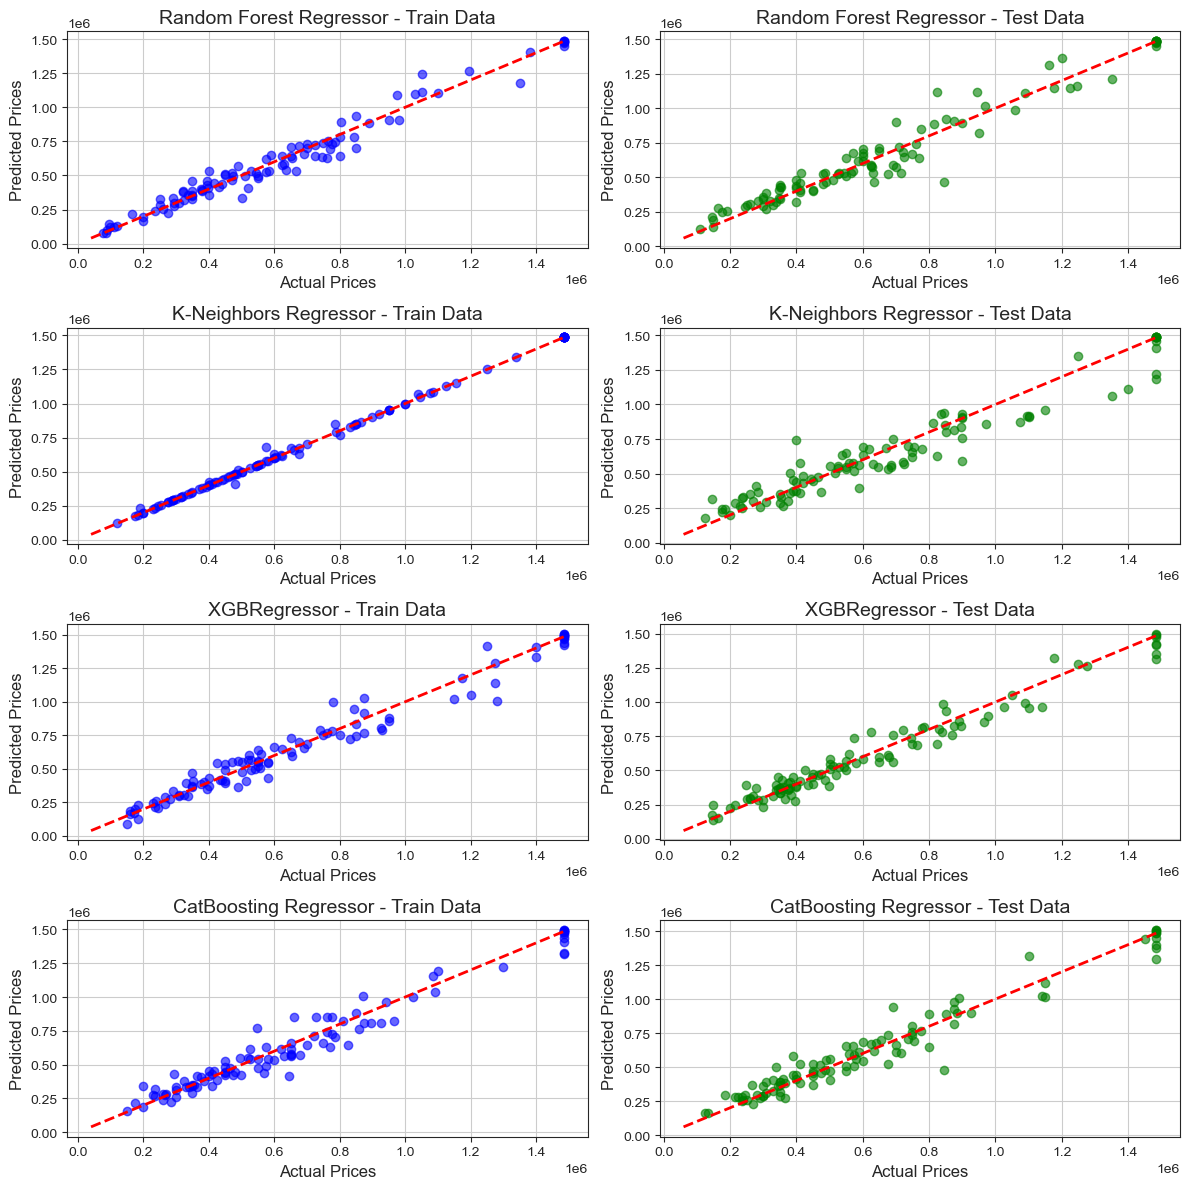

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Define a subsample size for clarity
subsample_size = 100  # Adjust as needed based on dataset size

# Convert to NumPy arrays if needed (e.g., if using Pandas)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create subplots for each model
n_models = len(models)
fig, axes = plt.subplots(n_models, 2, figsize=(12, 3 * n_models))

for idx, (model_name, model) in enumerate(models.items()):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Ensure subsample size does not exceed dataset size
    train_indices = np.random.choice(len(y_train), size=min(subsample_size, len(y_train)), replace=False)
    test_indices = np.random.choice(len(y_test), size=min(subsample_size, len(y_test)), replace=False)

    # Subsample for visualization
    y_train_sample = y_train[train_indices]
    y_train_pred_sample = y_train_pred[train_indices]

    y_test_sample = y_test[test_indices]
    y_test_pred_sample = y_test_pred[test_indices]

    # Scatter plot for Training data
    axes[idx, 0].scatter(y_train_sample, y_train_pred_sample, alpha=0.6, color="blue")
    axes[idx, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Perfect prediction line
    axes[idx, 0].set_title(f"{model_name} - Train Data", fontsize=14)
    axes[idx, 0].set_xlabel("Actual Prices", fontsize=12)
    axes[idx, 0].set_ylabel("Predicted Prices", fontsize=12)
    axes[idx, 0].grid(True)

    # Scatter plot for Testing data
    axes[idx, 1].scatter(y_test_sample, y_test_pred_sample, alpha=0.6, color="green")
    axes[idx, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    axes[idx, 1].set_title(f"{model_name} - Test Data", fontsize=14)
    axes[idx, 1].set_xlabel("Actual Prices", fontsize=12)
    axes[idx, 1].set_ylabel("Predicted Prices", fontsize=12)
    axes[idx, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


### Best Model is CATBoost Regressor with 94.54% R2 Score

In [51]:
import pickle

print(model_param.keys())  
# Define models with their best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param.get('RF', {}), n_jobs=-1),
    "K-Neighbors Regressor": KNeighborsRegressor(**model_param.get('KNN', {})),
    "XGBRegressor": XGBRegressor(**model_param.get('XGBoost', {}), n_jobs=-1), 
    "CatBoosting Regressor": CatBoostRegressor(**model_param.get('CatBoost', {}), verbose=False)
}

model_list = []
r2_list = []

# Train, evaluate, and save each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate performance
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Append results
    model_list.append(model_name)
    r2_list.append(model_test_r2)

    # Print performance metrics
    print(f"{model_name} Performance:")
    print("- Training RMSE: {:.4f}, MAE: {:.4f}, R2: {:.4f}".format(model_train_rmse, model_train_mae, model_train_r2))
    print("- Testing RMSE: {:.4f}, MAE: {:.4f}, R2: {:.4f}".format(model_test_rmse, model_test_mae, model_test_r2))
    print("=" * 50)

    # Serialize the model using pickle
    filename = f"{model_name.replace(' ', '_')}.pkl"
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    print(f"{model_name} saved as {filename}")

print("\nAll models have been trained and saved.")


dict_keys(['KNN', 'RF', 'XGBoost', 'CatBoost'])
Training Random Forest Regressor...
Random Forest Regressor Performance:
- Training RMSE: 68250.2432, MAE: 49370.3268, R2: 0.9659
- Testing RMSE: 91365.4910, MAE: 62194.0501, R2: 0.9428
Random Forest Regressor saved as Random_Forest_Regressor.pkl
Training K-Neighbors Regressor...
K-Neighbors Regressor Performance:
- Training RMSE: 19930.5681, MAE: 5388.9331, R2: 0.9971
- Testing RMSE: 105838.0007, MAE: 68774.5915, R2: 0.9232
K-Neighbors Regressor saved as K-Neighbors_Regressor.pkl
Training XGBRegressor...
XGBRegressor Performance:
- Training RMSE: 72315.4269, MAE: 53000.0365, R2: 0.9617
- Testing RMSE: 89428.2926, MAE: 61875.4091, R2: 0.9452
XGBRegressor saved as XGBRegressor.pkl
Training CatBoosting Regressor...
CatBoosting Regressor Performance:
- Training RMSE: 76915.7926, MAE: 56055.3456, R2: 0.9567
- Testing RMSE: 90075.1658, MAE: 62785.6755, R2: 0.9444
CatBoosting Regressor saved as CatBoosting_Regressor.pkl

All models have been tr

In [52]:
import pandas as pd

# Step 1: Define the new data
new_data = pd.DataFrame(
    [['Hyundai', 'Venue',6, 50000, 'Individual', 'Petrol', 'Manual', 19.7, 1500, 46.3, 7]],
    columns=['brand','model','vehicle_age','km_driven','seller_type','fuel_type','transmission_type','mileage','engine','max_power','seats']
)

# Step 2: Preprocess the new data
new_data_transformed = preprocessor.transform(new_data)

# Step 3: Verify transformed data shape
print("Shape of transformed data:", new_data_transformed.shape)

# Step 4: Make a prediction
prediction = model.predict(new_data_transformed)
print("Predicted Selling Price:", prediction[0])


Shape of transformed data: (1, 11)
Predicted Selling Price: 788770.5270381962


In [46]:
import pandas as pd

# Function to convert numbers to words with Lakhs, Thousands, Hundreds, and Rupees
def number_to_words_lakhs_thousands_hundreds(n):
    ones = ["", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Ten",
            "Eleven", "Twelve", "Thirteen", "Fourteen", "Fifteen", "Sixteen", "Seventeen", "Eighteen", "Nineteen"]
    tens = ["", "", "Twenty", "Thirty", "Forty", "Fifty", "Sixty", "Seventy", "Eighty", "Ninety"]

    def convert_hundreds(n):
        if n == 0:
            return ""
        elif n < 20:
            return ones[n]
        elif n < 100:
            return tens[n // 10] + ('' if n % 10 == 0 else ' ' + ones[n % 10])
        else:
            return ones[n // 100] + " Hundred" + ('' if n % 100 == 0 else ' and ' + convert_hundreds(n % 100))

    lakhs = n // 100000
    n %= 100000
    thousands = n // 1000
    n %= 1000
    hundreds = n

    result = []
    
    if lakhs > 0:
        result.append(f"{convert_hundreds(lakhs)} Lakh" + ("s" if lakhs > 1 else ""))
    
    if thousands > 0:
        result.append(f"{convert_hundreds(thousands)} Thousand" + ("s" if thousands > 1 else ""))
    
    if hundreds > 0:
        result.append(f"{convert_hundreds(hundreds)} Hundred")
    
    result.append("Rupees")  # Append "Rupees" at the end
    return ', '.join(result) if result else "Zero Rupees"

# Step 1: Define the new data
new_data = pd.DataFrame(
    [['Maruti', 'Swift', 9, 80000, 'Individual', 'Petrol', 'Manual', 20, 800, 46, 5]],
    columns=['brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']
)

# Step 2: Preprocess the new data
new_data_transformed = preprocessor.transform(new_data)

# Step 3: Verify transformed data shape
print("Shape of transformed data:", new_data_transformed.shape)

# Step 4: Make a prediction
prediction = model.predict(new_data_transformed)
print("Predicted Selling Price:", prediction[0])

# Step 5: Convert prediction to words with Lakhs, Thousands, Hundreds, and Rupees
prediction_in_words = number_to_words_lakhs_thousands_hundreds(int(prediction[0]))  # Convert number to integer and to words
print("Predicted Selling Price in Words:", prediction_in_words)


Shape of transformed data: (1, 11)
Predicted Selling Price: 244852.83890384552
Predicted Selling Price in Words: Two Lakhs, Forty Four Thousands, Eight Hundred and Fifty Two Hundred, Rupees


In [47]:
from catboost import CatBoostRegressor
import pickle

# Load the machine learning model
try:
    model = pickle.load(open('CatBoosting_Regressor.pkl', 'rb'))
    if not isinstance(model, CatBoostRegressor):
        raise ValueError("Loaded object is not a CatBoostRegressor model")
except Exception as e:
    print(f"Error loading the model: {e}")
    model = None


In [48]:
import pickle

# Specify the path to the pickle file
file_path = 'CatBoosting_Regressor.pkl'

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    loaded_object = pickle.load(file)

# Check the type of the loaded object
print(f"Type of the loaded object: {type(loaded_object)}")

# If it’s a model, you can inspect it further (e.g., if it’s a CatBoostRegressor model)
try:
    print(loaded_object)
except Exception as e:
    print(f"Error inspecting the object: {e}")


Type of the loaded object: <class 'catboost.core.CatBoostRegressor'>


In [51]:
import pickle
import pandas as pd

# Load the trained model (replace with the correct filename)
with open('CatBoosting_Regressor.pkl', 'rb') as file:
    model = pickle.load(file)

# Step 1: Define new data
new_data = pd.DataFrame(
    [['Hyundai', 'Venue', 2, 20000, 'Individual', 'Petrol', 'Automatic', 18.15,998 , 118.35, 5]],
    columns=['brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']
)

# Step 2: Preprocess new data
new_data_transformed = preprocessor.transform(new_data)

# Step 3: Make a prediction
prediction = model.predict(new_data_transformed)
print("Predicted Selling Price:", prediction[0])


Predicted Selling Price: 1104586.0965465596


In [7]:
from tabulate import tabulate
result = df.groupby('brand')['model'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()
result.rename(columns={'Model': 'Models'}, inplace=True)
print(tabulate(result, headers='keys', tablefmt='plain', stralign='left'))

    brand          model
 0  Audi           A4, A6, A8, Q7
 1  BMW            3, 5, 6, 7, X1, X3, X4, X5, Z4
 2  Bentley        Continental
 3  Datsun         GO, RediGO, redi-GO
 4  Ferrari        GTC4Lusso
 5  Force          Gurkha
 6  Ford           Aspire, Ecosport, Endeavour, Figo, Freestyle
 7  Honda          Amaze, CR, CR-V, City, Civic, Jazz, WR-V
 8  Hyundai        Aura, Creta, Elantra, Grand, Santro, Tucson, Venue, Verna, i10, i20
 9  ISUZU          MUX
10  Isuzu          D-Max, MUX
11  Jaguar         F-PACE, XE, XF
12  Jeep           Compass, Wrangler
13  Kia            Carnival, Seltos
14  Land Rover     Rover
15  Lexus          ES, NX, RX
16  MG             Hector
17  Mahindra       Alturas, Bolero, KUV, KUV100, Marazzo, Scorpio, Thar, XUV300, XUV500
18  Maruti         Alto, Baleno, Celerio, Ciaz, Dzire LXI, Dzire VXI, Dzire ZXI, Eeco, Ertiga, Ignis, S-Presso, Swift, Swift Dzire, Vitara, Wagon R, XL6
19  Maserati       Ghibli, Quattroporte
20  Mercedes-AMG   C
21  Mercedes